# Prediction Model



In [38]:
# importing librairies ...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score

# %matplotlib notebook

In [39]:
# The first step is to retrieve cleaned data 
df = pd.read_csv('./dataset/immoCollect52house-clean.csv', index_col = 0)

## Cleaning / manipulation 

First, I'm going to do a little data cleansing to make sure that it corresponds precisely to my expectations for this project.

In [40]:
print(df.shape)
df.head()

(19788, 18)


,postal_code,price,number_of_bedroom,house_area,fully_equipped_kitchen,terrace,garden,number_of_facades,swimming_pool,is_new,locality,district,province,province_int,region,region_int,district_int,ratio_free_build
6,1650,525000,4,220,1,1,1,4,0,1,Beersel,Hal-Vilvorde,brabant-flamand,5.0,flandre,0.0,8.0,-2.851322
9,1332,549000,4,210,1,1,1,4,0,1,Rixensart,Nivelles,brabant-wallon,8.0,wallonie,1.0,4.0,-3.410265
10,8310,519000,3,273,1,0,1,4,0,1,Brugge,Brugge,flandre-occidentale,0.0,flandre,0.0,28.0,-2.429051
12,8200,535000,4,200,1,1,1,4,0,1,Brugge,Brugge,flandre-occidentale,0.0,flandre,0.0,28.0,-2.429051
19,7850,550000,4,276,1,1,1,4,0,1,Enghien,Ath,hainaut,6.0,wallonie,1.0,9.0,-2.097867


In [41]:
# I retrieve only utils columns for my model
ratio_fb = df['ratio_free_build']
df = df.iloc[:,1:9]
df['ratio_free_build'] = ratio_fb

In [42]:
cols = df.columns.tolist()
print(cols)
# cols = cols[0:] + cols[:-1]
# df = df[cols]

['price', 'number_of_bedroom', 'house_area', 'fully_equipped_kitchen', 'terrace', 'garden', 'number_of_facades', 'swimming_pool', 'ratio_free_build']


In [43]:
df.head()

,price,number_of_bedroom,house_area,fully_equipped_kitchen,terrace,garden,number_of_facades,swimming_pool,ratio_free_build
6,525000,4,220,1,1,1,4,0,-2.851322
9,549000,4,210,1,1,1,4,0,-3.410265
10,519000,3,273,1,0,1,4,0,-2.429051
12,535000,4,200,1,1,1,4,0,-2.429051
19,550000,4,276,1,1,1,4,0,-2.097867


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19788 entries, 6 to 59161
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   19788 non-null  int64  
 1   number_of_bedroom       19788 non-null  int64  
 2   house_area              19788 non-null  int64  
 3   fully_equipped_kitchen  19788 non-null  int64  
 4   terrace                 19788 non-null  int64  
 5   garden                  19788 non-null  int64  
 6   number_of_facades       19788 non-null  int64  
 7   swimming_pool           19788 non-null  int64  
 8   ratio_free_build        19788 non-null  float64
dtypes: float64(1), int64(8)
memory usage: 1.5 MB


### Testing boxcox

Text(0.5, 1.0, 'Probplot after Box-Cox transformation')

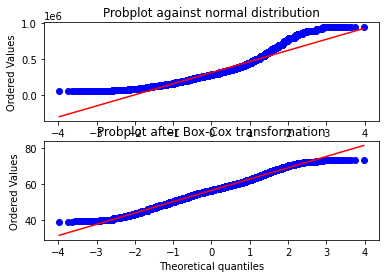

In [45]:
from scipy import stats
from scipy.special import boxcox, inv_boxcox

POWER = 0.2

fig = plt.figure()
ax1 = fig.add_subplot(211)
prob = stats.probplot(df['price'], dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

ax2 = fig.add_subplot(212)
xt = boxcox(df['price'],POWER)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

In [46]:
price_temp = boxcox(df['price'],POWER )

(array([  36.,   59.,   61.,   74.,   75.,   96.,   93.,  131.,  270.,
          85.,  206.,  211.,  395.,  413.,  462.,  426.,  416.,  532.,
         517.,  676.,  454.,  905.,  610., 1012.,  965., 1116., 1130.,
         798.,  979.,  946.,  686.,  939.,  305.,  407.,  480.,  369.,
         348.,  217.,  301.,  300.,  153.,  222.,  151.,  146.,  130.,
          85.,  139.,   98.,  102.,   61.]),
 array([38.87030695, 39.56161824, 40.25292952, 40.94424081, 41.6355521 ,
        42.32686339, 43.01817467, 43.70948596, 44.40079725, 45.09210854,
        45.78341982, 46.47473111, 47.1660424 , 47.85735369, 48.54866498,
        49.23997626, 49.93128755, 50.62259884, 51.31391013, 52.00522141,
        52.6965327 , 53.38784399, 54.07915528, 54.77046656, 55.46177785,
        56.15308914, 56.84440043, 57.53571171, 58.227023  , 58.91833429,
        59.60964558, 60.30095686, 60.99226815, 61.68357944, 62.37489073,
        63.06620201, 63.7575133 , 64.44882459, 65.14013588, 65.83144716,
        66.52275

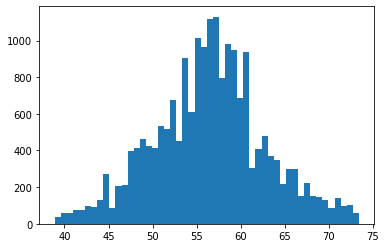

In [47]:
plt.hist(price_temp, 50)

In [48]:
price_temp.skew()

0.0358613291361834

### Applying to my DF

In [49]:
# df['price'] = boxcox(df['price'], POWER)

In [50]:
df['price'].skew()

1.239288276761603

In [51]:
# df['price'] = inv_boxcox(df['price'], POWER)

In [52]:
df['price'].skew()

1.239288276761603

## Let's train and predict for HOUSE !

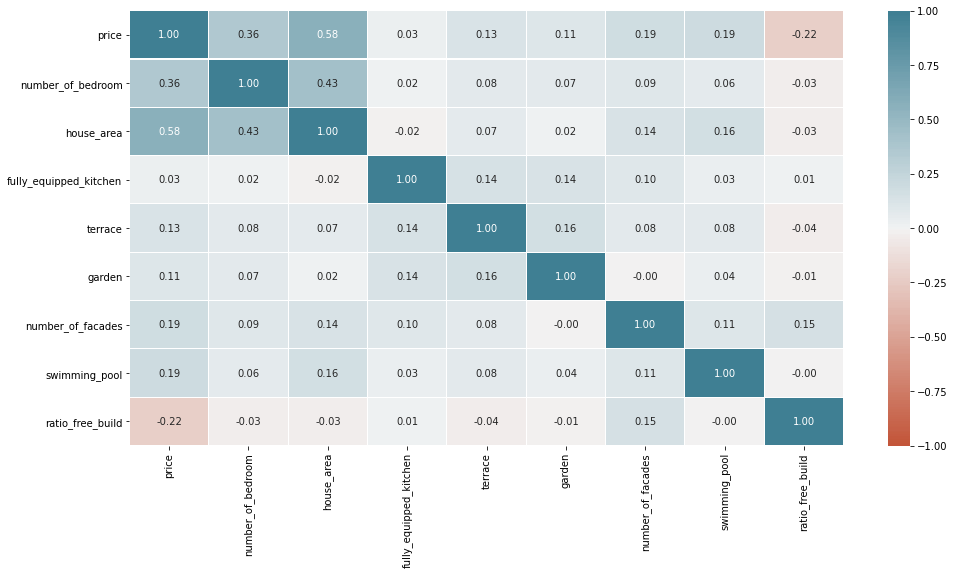

In [53]:
# Print the heatmap
plt.subplots(figsize=(16, 8))   
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

In [54]:
X = df.drop(columns=['price'])
X.head()

,number_of_bedroom,house_area,fully_equipped_kitchen,terrace,garden,number_of_facades,swimming_pool,ratio_free_build
6,4,220,1,1,1,4,0,-2.851322
9,4,210,1,1,1,4,0,-3.410265
10,3,273,1,0,1,4,0,-2.429051
12,4,200,1,1,1,4,0,-2.429051
19,4,276,1,1,1,4,0,-2.097867


In [55]:
y = df[['price']]
y.head()

,price
6,525000
9,549000
10,519000
12,535000
19,550000


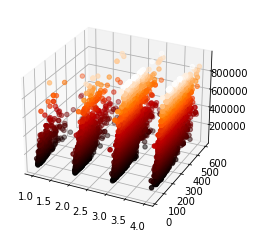

In [56]:
# %matplotlib notebook
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter3D( X['number_of_bedroom'],X['house_area'], y, c=y, cmap='gist_heat')
ax.view_init(27, -64)

### Split the dataset

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

In [58]:
X_test

,number_of_bedroom,house_area,fully_equipped_kitchen,terrace,garden,number_of_facades,swimming_pool,ratio_free_build
42078,4,353,1,0,0,2,0,-1.861387
54962,3,150,1,0,1,1,0,-2.314025
4986,3,225,1,1,1,4,0,-2.863048
3670,4,410,1,1,1,4,0,-1.611101
50529,3,125,1,1,1,3,0,-3.112351
...,...,...,...,...,...,...,...,...
42190,3,304,1,0,0,4,0,-1.758649
753,3,232,0,1,0,1,0,-2.522504
34173,3,106,0,0,0,2,0,-2.719016
48992,3,124,0,1,1,1,0,-2.657320


### Scaler

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Init a standard scaler
ss = MinMaxScaler()

# Scale the features
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### 1. Multiple Linear regression

In [61]:
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train) # Entrainement du model

LinearRegression()

In [62]:
score = regressor.score(X_train,y_train)
score

0.4251736740221935

In [63]:
score = regressor.score(X_test,y_test)
score

0.42532330821281195

### 2. With polynomial regression

In [84]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree = 4

pipe=make_pipeline(PolynomialFeatures(degree),LinearRegression())

In [85]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

In [86]:
pipe.score(X_train, y_train)

0.5199178373427655

In [87]:
pipe.score(X_test, y_test)

0.48759173618092255

### 3. KNN Regressor

In [109]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9)

In [110]:
knn.score(X_train, y_train)

0.5727275840216692

In [111]:
knn.score(X_test, y_test)

0.4360887724883715

### 4. Decision Trees

In [138]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

regressor = DecisionTreeRegressor(random_state=42, max_depth=9, min_samples_split=2)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, random_state=42)

In [139]:
regressor.score(X_train, y_train)

0.5939050318778563

In [140]:
regressor.score(X_test, y_test)

0.5017076813948786

### 5. Random Forest Regressor

In [157]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=6, random_state=42)
regr.fit(X, y)

<ipython-input-157-2e99fa92c08c>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, y)


RandomForestRegressor(max_depth=6, random_state=42)

In [158]:
regr.score(X_train, y_train)

-1.13209058523503

In [159]:
regr.score(X_test, y_test)

-1.0932757143611918

In [160]:
y_pred = regr.predict(X_test)
r2_score(y_test, y_pred)

-1.0932757143611918

### 6.Gradient boost

In [196]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=42, n_estimators=3000, learning_rate=0.01)
reg.fit(X_train, y_train)

/home/leersla/Desktop/Turing4/ImmoEliza-API/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(learning_rate=0.01, n_estimators=3000,
                          random_state=42)

In [197]:
reg.score(X_train, y_train)

0.6619458101196463

In [198]:
reg.score(X_test, y_test)

0.6240601385849622

### 7. XGB

In [227]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, n_estimators=3000,
                             learning_rate=0.01, max_depth=7)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=3000, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [228]:
xgb_model.score(X_train, y_train)

0.8451811897292874

In [229]:
xgb_model.score(X_test, y_test)

0.681344696706812

In [230]:
y_pred = xgb_model.predict(X_test)
r2_score(y_test, y_pred)


0.681344696706812

### CatBoostRegressor

In [243]:
from catboost import CatBoostRegressor

cbr_model = CatBoostRegressor(learning_rate=0.01, depth=7, iterations=10000, random_seed=42, loss_function='RMSE', od_type='Iter')
fit_model = cbr_model.fit(X_train,
                          y_train,
                          eval_set=(X_test, y_test),
                          use_best_model=True,
                          early_stopping_rounds=10,
                          verbose=100)

print(fit_model.get_params())

0:	learn: 161440.3425200	test: 156840.6005562	best: 156840.6005562 (0)	total: 5ms	remaining: 50s
100:	learn: 124276.1923956	test: 121061.4424564	best: 121061.4424564 (100)	total: 514ms	remaining: 50.4s
200:	learn: 114494.4120512	test: 112320.1873029	best: 112320.1873029 (200)	total: 1.01s	remaining: 49.3s
300:	learn: 110522.8272629	test: 108999.0246043	best: 108999.0246043 (300)	total: 1.6s	remaining: 51.5s
400:	learn: 108055.2168287	test: 107103.9658758	best: 107103.9658758 (400)	total: 2.08s	remaining: 49.7s
500:	learn: 106408.6889115	test: 105876.4800048	best: 105876.4800048 (500)	total: 2.62s	remaining: 49.6s
600:	learn: 104897.8427471	test: 104735.8713046	best: 104735.8713046 (600)	total: 3.12s	remaining: 48.7s
700:	learn: 103627.8609648	test: 103804.4337530	best: 103804.4337530 (700)	total: 3.61s	remaining: 47.8s
800:	learn: 102573.2214081	test: 103126.2868704	best: 103126.2868704 (800)	total: 4.08s	remaining: 46.9s
900:	learn: 101641.6480822	test: 102493.7452943	best: 102493.745

In [244]:
fit_model.score(X_test, y_test)

-3182.5298032024875

In [245]:
y_pred = fit_model.predict(X_train)
r2_score(y_train, y_pred)

0.6961512235283371

In [246]:
y_pred = fit_model.predict(X_test)
r2_score(y_test, y_pred)

0.6328964366276302

## Pickle it

In [247]:
# import pickle
# tup = (xgb_model, ss)
# pickle.dump(tup, open("model_bin/house_model.p", "wb" ))